In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import joblib

In [7]:
df = pd.read_csv("customer_churn.csv")
print("Dataset Loaded Successfully!\n")
print(df.head())

Dataset Loaded Successfully!

   customer_id  gender  age  monthly_charges  tenure_months internet_service  \
0            1    Male   27           255.34             60              DSL   
1            2  Female   31           945.47              2            Fiber   
2            3    Male   66          1864.80             30              DSL   
3            4  Female   57           966.43             26              DSL   
4            5    Male   64           505.90             49              DSL   

    contract_type payment_method  total_charges  churn  
0        One year           Cash       35292.13      0  
1  Month-to-month           Cash       45074.24      0  
2        One year    Credit Card       65381.60      0  
3  Month-to-month    Credit Card       73937.60      0  
4        One year            UPI       52926.71      1  


In [8]:
print("\nMissing Values:")
print(df.isnull().sum())

print("\nDataset Info:")
print(df.info())


Missing Values:
customer_id         0
gender              0
age                 0
monthly_charges     0
tenure_months       0
internet_service    0
contract_type       0
payment_method      0
total_charges       0
churn               0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       100 non-null    int64  
 1   gender            100 non-null    object 
 2   age               100 non-null    int64  
 3   monthly_charges   100 non-null    float64
 4   tenure_months     100 non-null    int64  
 5   internet_service  100 non-null    object 
 6   contract_type     100 non-null    object 
 7   payment_method    100 non-null    object 
 8   total_charges     100 non-null    float64
 9   churn             100 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 7.9+ KB
None


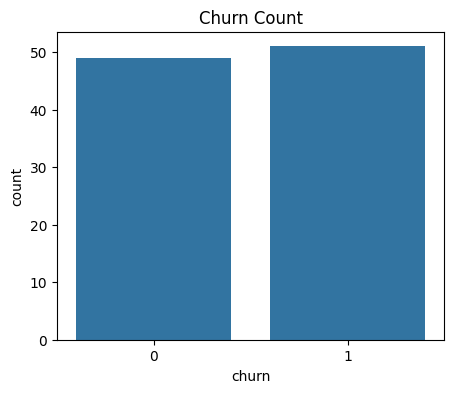

In [9]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='churn')
plt.title("Churn Count")
plt.show()

In [10]:
label = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label.fit_transform(df[column])

In [12]:
X = df.drop("churn", axis=1)
y = df["churn"]


In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
print("\n📌 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


📌 Logistic Regression Accuracy: 0.7


In [16]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("\n📌 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


📌 Random Forest Accuracy: 0.55

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.50      0.57        12
           1       0.45      0.62      0.53         8

    accuracy                           0.55        20
   macro avg       0.56      0.56      0.55        20
weighted avg       0.58      0.55      0.55        20



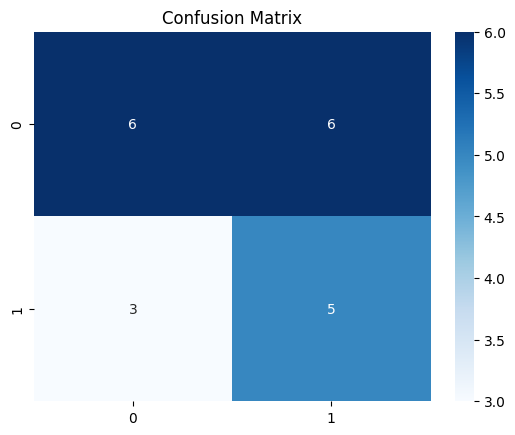

In [17]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [18]:
joblib.dump(rf, "churn_prediction_model.pkl")
print("\nModel Saved Successfully as churn_prediction_model.pkl")



Model Saved Successfully as churn_prediction_model.pkl
